### Kunskapskontroll SQL

## _Teoretiska Frågor_

#### Fråga 1 _Beskriv kort hur en relationsdatabas fungerar_


En relationsdatabas organiserar data i tabeller bestående av rader och kolumner, där varje tabell representerar en specifik typ av information och har ett unikt namn. Tabellerna är sammankopplade genom relationer: med hjälp av primär- och främmande nycklar, vilket gör det möjligt att kombinera och strukturera data från olika tabeller. För att hantera och interagera med en relationsdatabas används SQL (Structured Query Language), som gör det möjligt att skapa, läsa, uppdatera och analysera data.

Relationsdatabaser kan designas med olika nivåer av normalisering.  Normalisering delas upp i olika grader, såsom första normagrad  till högre nivåer som tredje normalgrad och vidare. Varje högre normalgrad innebär striktare regler för hur data organiseras och hur tabeller bryts ned för att säkerställa en mer effektiv databasstruktur.

För att planera och visualisera strukturen i en relationsdatabas används ofta ER-diagram (Entity-Relationship-diagram). Dessa diagram hjälper till att definiera entiteter (tabeller), deras attribut (kolumner) och relationerna mellan dem. SQL används för att implementera den struktur och de relationer som designas i ER-diagrammet.

#### Fråga 2  _Vad menas med “CRUD”-flödet?_


CRUD är en akronym för Create, Read, Update, och Delete, och beskriver de grundläggande operationerna som kan utföras på data i en relationell databas eller ett system:

Create: Skapa och lägga till nya rader i en tabell.
Read: Läsa ut och hämta data från en tabell.
Update: Uppdatera befintlig data i en tabell.
Delete: Ta bort rader från en tabell.
Dessa operationer kan påverka en eller flera rader beroende på hur frågan (query) till databasen är utformad.   CRUD är en central del av databasinteraktion och används för att beskriva funktionalitet i databaser och många programvaror. Skapandet av databaser och tabeller inkluderas inte i CRUD-flödet.

#### Fråga 3 _Beskriv kort vad en “left join” och en “inner join” är. Varför använder man det?_

Left Join och Inner Join är två typer av JOIN-operationer i SQL som används för att kombinera data från två eller fler tabeller. 

#### _Left Join_:

Left Join returnerar alla rader från den vänstra tabellen (den som anges efter FROM), och matchande rader från den högra tabellen (den som anges efter JOIN). Om det inte finns någon match i den högra tabellen, fylls dessa kolumner med NULL.
Left Join används när vi vill behålla all data från den vänstra tabellen, även om det saknas motsvarande match i den högra. Exempel: Lista alla kunder, oavsett om de har gjort några köp eller inte.
#### _Inner Join_:

Inner Join returnerar endast rader där det finns en match mellan den vänstra och högra tabellen. Den hämtar enbart data som uppfyller det angivna villkoret.
Inner Join används när vi bara vill inkludera data som finns i båda tabellerna. Exempel: Visa endast kunder som faktiskt har gjort köp.

#### _Användning_:

Dessa JOIN-typer används för att kombinera kolumner från flera tabeller till en ny tabell för att underlätta extragering av data som behövs. Inner Join används när vi behöver strikt matchande data från båda tabeller, medan Left Join är användbart när vi vill inkludera alla poster från den vänstra tabellen, även om motsvarande data saknas i den högra.



#### FRÅGA 4 _Beskriv kort vad indexering i SQL innebär._

Indexering i SQL är en teknik som används för att förbättra prestandan vid sökningar i en databas. Ett index skapas på en eller flera kolumner, vilket gör att systemet kan hitta rader som uppfyller ett visst kriterium snabbare, utan att behöva söka igenom hela tabellen rad för rad.

Det finns två huvudsakliga typer av index:

##### _Klustrat index (Clustered Index)_:
Lagrar data fysiskt i en sorterad ordning baserat på det indexerade värdet och är effektivt för intervallsökningar eller sorterade läsningar. Varje tabell kan ha högst ett klustrat index.
##### _Icke-klustrat index (Non-Clustered Index)_:
 Skapar en separat datastruktur som pekar på datans plats utan att ändra tabellens fysiska ordning. En tabell kan ha flera icke-klustrade index.

Indexering förbättrar prestandan för läsoperationer, men kan göra skrivoperationer som INSERT, UPDATE, och DELETE långsammare eftersom indexet behöver uppdateras. Valet av index beror på tabellens användning – om tabellen oftast används för att läsa data är indexering fördelaktigt, men det borde undvikas om tabellen ofta skrivs till (eller UPDATE och DELETE operationer används).

#### Fråga 5 _Beskriv kort vad en vy i SQL är._

En vy i SQL är en virtuell tabell som bygger på en definierad fråga (query) och presenterar data i tabellformat. Vyer innehåller inte data själva utan visar resultatet av den sparade frågan varje gång de används, och uppdateras dynamiskt när de underliggande tabellerna ändras.

 De erbjuder flera fördelar, såsom förenklad åtkomst genom att spara ofta använda frågor. Dessutom förbättrar de säkerheten genom att möjliggöra delning av specifik information utan att ge fullständig åtkomst till den underliggande databasen. Slutligen ökar de effektiviteten genom att minska behovet av att skriva och köra samma fråga upprepade gånger.

#### Fråga 6 _Beskriv kort vad en lagrad procedur i SQL är._

En lagrad procedur i SQL är en sparad uppsättning SQL-kod som kan återanvändas för att utföra specifika uppgifter i databasen. Den centraliserar och standardiserar logik och definitioner, vilket säkerställer konsistenta resultat och effektivitet när flera användare använder samma procedur. Proceduren kan ta emot parametrar, vilket gör att logiken kan anpassas baserat på olika indata och önskat resultat.

Lagrade procedurer är snabbare att anropa än att skriva samma kod vid varje användning, vilket förbättrar prestanda. De skapas med ett CREATE-statement där namnet och logiken definieras. Både lagrade procedurer och vyer kan användas för att hantera liknande problem, och valet beror på vilket verktyg som passar bäst för det aktuella ändamålet.

# Utforskning av  databas AdventureWorks2022

In [51]:
from sqlalchemy import create_engine, URL, inspect
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import norm
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [3]:

# Kopplingen till databasen etableras med hjälp av ODBC och SQLAlchemy-biblioteket i Python."
SERVER = 'localhost'
DATABASE = 'AdventureWorks2022'

connection_string = f"Driver={{ODBC Driver 18 for SQL Server}};Server=localhost;Database=AdventureWorks2022;Trusted_Connection=yes;Encrypt=no"
connection_url = URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})
engine = create_engine(connection_url)



In [5]:
print(type(engine))

<class 'sqlalchemy.engine.base.Engine'>


In [6]:
connection = engine.connect()

In [7]:
inspector = inspect(engine)
schemas = inspector.get_schema_names()
print(schemas)

['db_accessadmin', 'db_backupoperator', 'db_datareader', 'db_datawriter', 'db_ddladmin', 'db_denydatareader', 'db_denydatawriter', 'db_owner', 'db_securityadmin', 'dbo', 'guest', 'HumanResources', 'INFORMATION_SCHEMA', 'Person', 'Production', 'Purchasing', 'Sales', 'sys']


In [78]:
for schema in schemas:
    print(schema)

db_accessadmin
db_backupoperator
db_datareader
db_datawriter
db_ddladmin
db_denydatareader
db_denydatawriter
db_owner
db_securityadmin
dbo
guest
HumanResources
INFORMATION_SCHEMA
Person
Production
Purchasing
Sales
sys


## Queries för att utforska databasens struktur och få generella insikter

In [16]:
# Utforskar antal tabeller i databasen
db_exploration1_sql="""
SELECT TABLE_SCHEMA , COUNT(TABLE_NAME) AS NumberOfTables
FROM INFORMATION_SCHEMA.TABLES
GROUP BY TABLE_SCHEMA;
"""
db_exploration1_df = pd.read_sql(sql=db_exploration1_sql, con=connection)
print(db_exploration1_df)

     TABLE_SCHEMA  NumberOfTables
0          Person              17
1      Purchasing               7
2  HumanResources              12
3           Sales              28
4      Production              28
5             dbo               3


In [18]:
# Utforskar antal tabeller och deras namn grupperad på TABLE_SCHEMA och  TABLE_NAME  med hjälp av Window function.
db_exploration2_sql="""
SELECT 
    TABLE_SCHEMA,
    TABLE_NAME,
    COUNT(TABLE_NAME) OVER (PARTITION BY TABLE_SCHEMA) AS TotalNumberOfTables
FROM 
    INFORMATION_SCHEMA.TABLES;
"""
db_exploration2_df = pd.read_sql(sql=db_exploration2_sql, con=connection)
db_exploration2_df.head()

,TABLE_SCHEMA,TABLE_NAME,TotalNumberOfTables
0,dbo,DatabaseLog,3
1,dbo,ErrorLog,3
2,dbo,AWBuildVersion,3
3,HumanResources,vEmployee,12
4,HumanResources,vEmployeeDepartment,12


In [20]:
# Utforskar vilka kolumner som finns i specifika tabeller och deras datatyper.
db_exploration3_sql="""
SELECT TABLE_SCHEMA, TABLE_NAME,COLUMN_NAME, DATA_TYPE, IS_NULLABLE, COLUMN_DEFAULT
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_SCHEMA = 'Sales' AND TABLE_NAME = 'SalesOrderDetail';
"""
db_exploration3_df = pd.read_sql(sql=db_exploration3_sql, con=connection)
db_exploration3_df.head(12)

,TABLE_SCHEMA,TABLE_NAME,COLUMN_NAME,DATA_TYPE,IS_NULLABLE,COLUMN_DEFAULT
0,Sales,SalesOrderDetail,SalesOrderID,int,NO,None
1,Sales,SalesOrderDetail,SalesOrderDetailID,int,NO,None
2,Sales,SalesOrderDetail,CarrierTrackingNumber,nvarchar,YES,None
3,Sales,SalesOrderDetail,OrderQty,smallint,NO,None
4,Sales,SalesOrderDetail,ProductID,int,NO,None
5,Sales,SalesOrderDetail,SpecialOfferID,int,NO,None
6,Sales,SalesOrderDetail,UnitPrice,money,NO,None
7,Sales,SalesOrderDetail,UnitPriceDiscount,money,NO,((0.0))
8,Sales,SalesOrderDetail,LineTotal,numeric,NO,None
9,Sales,SalesOrderDetail,rowguid,uniqueidentifier,NO,(newid())


In [32]:
# Utforskar vilka tabeller som har SalesOrder kolumn.
db_exploration4_sql="""
SELECT TABLE_SCHEMA, TABLE_NAME
FROM INFORMATION_SCHEMA.COLUMNS
WHERE COLUMN_NAME LIKE '%SalesOrderID%';
"""
db_exploration4_df = pd.read_sql(sql=db_exploration4_sql, con=connection)
db_exploration4_df.head()

,TABLE_SCHEMA,TABLE_NAME
0,Sales,SalesOrderDetail
1,Sales,TerritoryRevOrderView
2,Sales,SalesOrderHeader
3,Sales,SalesOrderHeaderSalesReason
4,Sales,TerritoryOrderDetailProductView


In [31]:
# Utforskar vilka tabeller som har SalesOrder kolumn.
db_exploration5_sql="""
SELECT TABLE_SCHEMA, TABLE_NAME
FROM INFORMATION_SCHEMA.COLUMNS
WHERE COLUMN_NAME LIKE '%ProductID%';
"""
db_exploration5_df = pd.read_sql(sql=db_exploration5_sql, con=connection)
db_exploration5_df.head(10)

,TABLE_SCHEMA,TABLE_NAME
0,Production,Product
1,Production,vProductAndDescription
2,Production,ProductCostHistory
3,Sales,ShoppingCartItem
4,Production,ProductDocument
5,Production,ProductInventory
6,Production,ProductListPriceHistory
7,Sales,SpecialOfferProduct
8,Production,ProductProductPhoto
9,Production,TransactionHistory


In [33]:
# Utforskar tidsperioden när databasen var aktiv.
db_exploration6_sql="""
SELECT 
    MIN(OrderDate) AS EarliestDate,
    MAX(OrderDate) AS LatestDate
FROM Sales.SalesOrderHeader;"""
db_exploration6_df = pd.read_sql(sql=db_exploration6_sql, con=connection)
db_exploration6_df.head()

,EarliestDate,LatestDate
0,2011-05-31,2014-06-30


In [69]:
# Utforskar i vilken valuta operationer pågår och hur många dagar har exchange operationerva i en viss valuta har skett.
db_exploration71_sql="""
SELECT 
    FromCurrencyCode,
    ToCurrencyCode,
    COUNT(DISTINCT CurrencyRateDate) AS DistinctDateCount
FROM Sales.CurrencyRate
GROUP BY FromCurrencyCode, ToCurrencyCode
ORDER BY FromCurrencyCode, ToCurrencyCode;"""
db_exploration71_df = pd.read_sql(sql=db_exploration71_sql, con=connection)
db_exploration71_df.head(14)

,FromCurrencyCode,ToCurrencyCode,DistinctDateCount
0,USD,ARS,1097
1,USD,AUD,1097
2,USD,BRL,1097
3,USD,CAD,1097
4,USD,CNY,1097
5,USD,DEM,184
6,USD,EUR,1097
7,USD,FRF,184
8,USD,GBP,1097
9,USD,JPY,1097


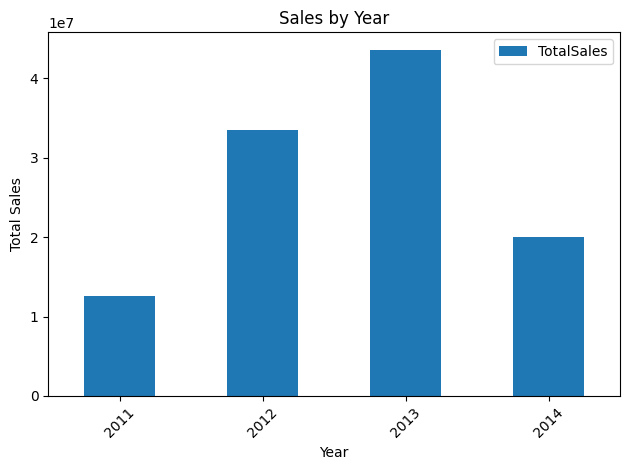

In [71]:
# Utforskar årligen sales data som inte inkluderar Freight cost och  Tax.
db_exploration7_sql="""
SELECT YEAR(OrderDate) AS Year, Round(SUM(SubTotal), 2) AS TotalSales
FROM Sales.SalesOrderHeader
GROUP BY YEAR(OrderDate)
ORDER BY Year;"""
db_exploration7_df = pd.read_sql(sql=db_exploration7_sql, con=connection)
db_exploration7_df.head()

db_exploration7_df.set_index('Year', inplace=True)


db_exploration7_df.plot(
    kind='bar', 
    title="Sales by Year", 
    xlabel="Year", 
    ylabel="Total Sales", 
    rot=45  
)

plt.tight_layout()

plt.show()

In [43]:
# Utforskar årligen sales data grupperad på Territory och uppdelad till e-commerce och Store sales som inte inkluderar Freight cost och  Tax.
db_exploration8_sql="""
SELECT 
    T.Name AS Territory,
    SUM(SOH.SubTotal) AS TotalSales,
    SUM(CASE WHEN SOH.OnlineOrderFlag = 1 THEN SOH.SubTotal ELSE 0 END) AS OnlineSales,
    SUM(CASE WHEN SOH.OnlineOrderFlag = 0 THEN SOH.SubTotal ELSE 0 END) AS PhysicalStoreSales    
FROM 
    Sales.SalesTerritory T
INNER JOIN 
    Sales.SalesOrderHeader SOH ON T.TerritoryID = SOH.TerritoryID
GROUP BY 
    T.Name
ORDER BY 
    TotalSales DESC;
"""
db_exploration8_df = pd.read_sql(sql=db_exploration8_sql, con=connection)
db_exploration8_df.head(10)

,Territory,TotalSales,OnlineSales,PhysicalStoreSales
0,Southwest,24184609.60,5718150.81,18466458.79
1,Canada,16355770.46,1977844.86,14377925.59
2,Northwest,16084942.55,3649866.55,12435076.00
3,Australia,10655335.96,9061000.58,1594335.38
4,Central,7909009.01,3000.83,7906008.18
5,Southeast,7879655.07,12238.85,7867416.22
6,United Kingdom,7670721.04,3391712.21,4279008.82
7,France,7251555.65,2644017.71,4607537.93
8,Northeast,6939374.48,6532.47,6932842.01
9,Germany,4915407.60,2894312.34,2021095.26


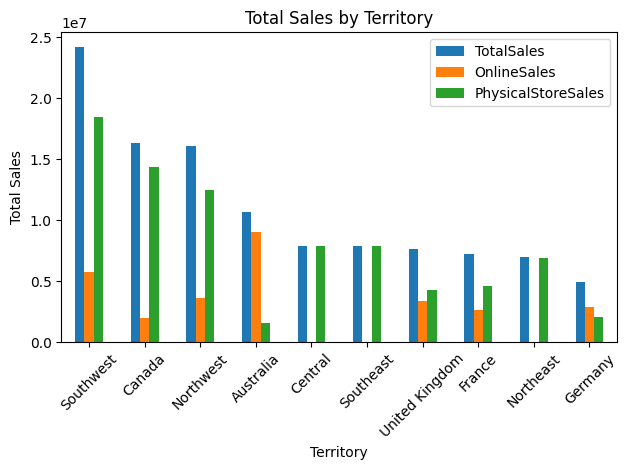

In [44]:
db_exploration8_df.set_index('Territory', inplace=True)


db_exploration8_df.plot(
    kind='bar', 
    title="Sales by Territory", 
    xlabel="Territory", 
    ylabel="Total Sales", 
    rot=45  
)

plt.tight_layout()

plt.show()

In [45]:
# Utforskar årligen sales data och agregerar den på år och Territory (summan inkluderar inte Freight cost och  Tax.)
db_exploration8_sql="""
SELECT 
    YEAR(SOH.OrderDate) AS SalesYear, 
    T.Name AS Territory,             
    ROUND(SUM(SOH.SubTotal), 2) AS TotalSales,
    ROUND(SUM(CASE WHEN SOH.OnlineOrderFlag = 1 THEN SOH.SubTotal ELSE 0 END), 2) AS OnlineSales,
    ROUND(SUM(CASE WHEN SOH.OnlineOrderFlag = 0 THEN SOH.SubTotal ELSE 0 END), 2) AS PhysicalStoreSales,
    SUM(SUM(SOH.SubTotal)) OVER (PARTITION BY YEAR(SOH.OrderDate)) AS TotalSalesByYear -- Window function
	FROM 
    Sales.SalesTerritory T
INNER JOIN 
    Sales.SalesOrderHeader SOH ON T.TerritoryID = SOH.TerritoryID
GROUP BY 
    YEAR(SOH.OrderDate), 
	T.Name 
ORDER BY 
    YEAR(SOH.OrderDate) ASC, TotalSales DESC; 
"""
db_exploration8_df = pd.read_sql(sql=db_exploration8_sql, con=connection)
db_exploration8_df.head()

,SalesYear,Territory,TotalSales,OnlineSales,PhysicalStoreSales,TotalSalesByYear
0,2011,Southwest,2807317.37,797556.50,2009760.87,12641672.21
1,2011,Northwest,2336872.90,512597.36,1824275.54,12641672.21
2,2011,Canada,1874382.42,197243.13,1677139.29,12641672.21
3,2011,Southeast,1640390.01,0.00,1640390.01,12641672.21
4,2011,Australia,1532156.31,1532156.31,0.00,12641672.21


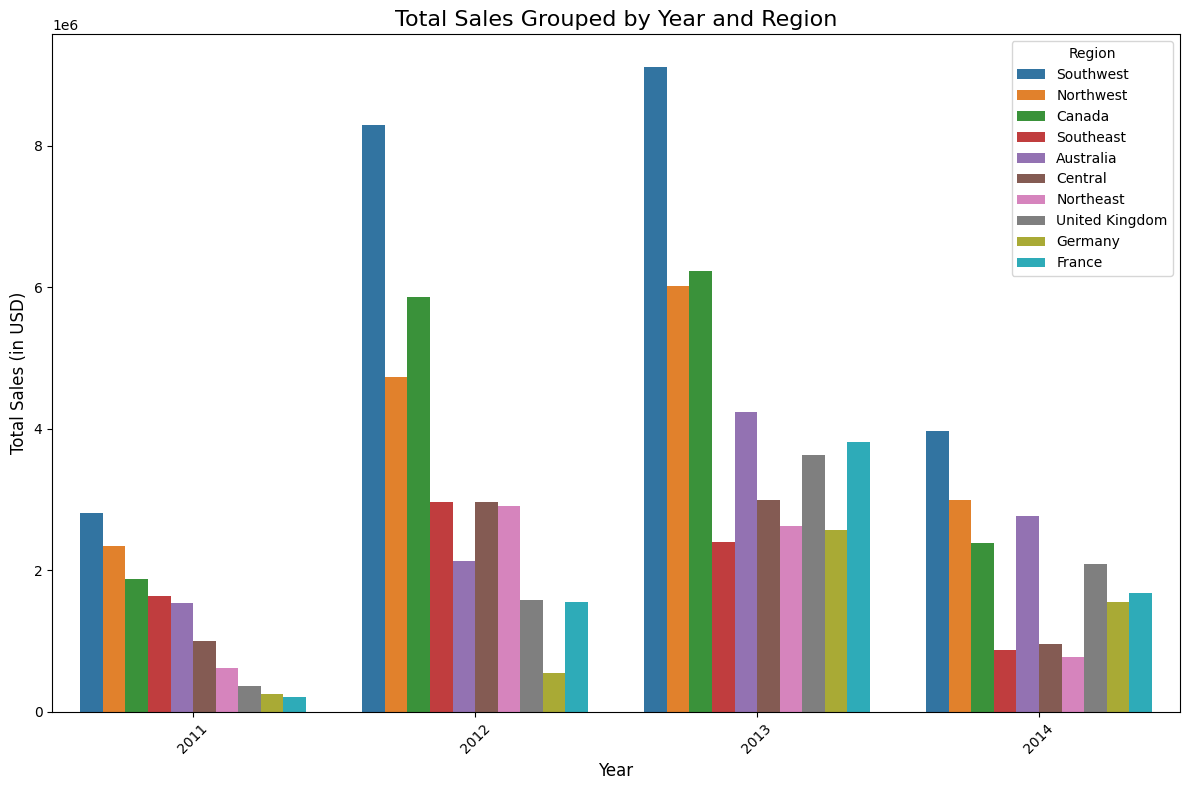

In [53]:
# Visualisering av årligen sales data som var agregerad  på Territory (summan inkluderar inte Freight cost och  Tax.)
plt.figure(figsize=(12, 8))
sns.barplot(
    data=db_exploration8_df,
    x="SalesYear",
    y="TotalSales",
    hue="Territory",  # Different colors for each region
    errorbar=None,  # Disable error bars (replaces `ci=None`)
)

# Add labels and title
plt.title("Total Sales Grouped by Year and Region", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales (in USD)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Region", fontsize=10)

# Improve layout and show the plot
plt.tight_layout()
plt.show()



### AdventureWorks2022-databasen
AdventureWorks2022 representerar en fiktiv affärsmiljö som representerar ett tillverkningsföretag som är baserad i USA och säljer cyklar och relaterade produkter. 
#### Scheman
Databasen är uppdelad i logiska grupper med hjälp av scheman, såsom:
* HumanResources: (12 Tables)Innehåller information om anställda och organisationens struktur.
* Production: (28 Tables )Innehåller information om produkter, deras kategorier och relaterade tillverknings detaljer.
* Person: (17 Tables) Allmän information om individer och deras kontaktuppgifter.
* Purchasing: (7 Tables)  Innehåller information om leverantörer och inköp.
* Sales: (28 tables) Innehåller data om försäljning, kunder och order transaktioner.


Databasen är strukturerad för att spegla verkliga affärsprocesser genom följande relationer:
#### _Kundrelationer_:_
Kunder lägger beställningar via tabellerna SalesOrderHeader och SalesOrderDetail, som är kopplade till produkter och deras kategorier.
#### _Anställda och organisation:_
Anställda hanterar avdelningar, med detaljer lagrade i tabellen Employee, som i sin tur länkar till Department.
#### _Leverantörsrelationer:_
Leverantörer tillhandahåller varor som listas i tabellen Product, och inköp registreras i tabellerna PurchaseOrder.

Det bästa överblikket över databasens struktur och relationer kan man få genom att kolla ER diagram.
Ovan i Query jag listat alla tabeller med deras datatyper och Constrains. 

Onlineförsäljning spåras separat från försäljning i fysiska butiker med hjälp av attributet OnlineOrderFlag i tabellen SalesOrderHeader,
vilket möjliggör analys av prestanda baserat på försäljningskanal.
Försäljningsdata kategoriseras efter områden som "Southwest," "Northwest," "Southeast," "Northeast" och "Central" för USA.
Internationella territorier som "Australien," "Storbritannien," "Tyskland," "Frankrike" och "Kanada" ger insikter om företagets globala räckvidd.
Databasens transaktioner omfattar tidsperioden från 2011-05-31 till 2014-06-30. Transaktionerna var genomförda i 14 olika valutor:
Argentine Peso,Australian Dollar, Brazilian Real,  Canadian Dollar,  Chinese Yuan, Deutsche Mark, Euro, French Franc, British Pound Sterling , Japanese Yen,  Mexican Peso, Saudi Riyal, United States Dollar, Venezuelan Bolívar. 

Bolaget visade sitt bästa resultat 2013. Butikerna presterar bättre än E-commerce delen.
Us Southwest region presterar bäst under alla år som omfattas av databasen.


#  Utforskning av E-commerce sales

In [72]:
#View skapade for att utforska sales 
combined_view_sql="""CREATE VIEW Sales.TerritoryOrderDetailProductView AS
SELECT 
    T.Name AS TerritoryName,
    SOH.SalesOrderID,
    SOH.OrderDate,
    SOH.CustomerID,
    SOH.OnlineOrderFlag,
    SOH.Freight,
    SOH.SubTotal,
    SOD.LineTotal,
    SOD.OrderQty,
    P.ProductID,
	P.Name AS ProductName,
    P.StandardCost,
    P.ListPrice
FROM Sales.SalesOrderHeader AS SOH
INNER JOIN Sales.SalesOrderDetail AS SOD
    ON SOH.SalesOrderID = SOD.SalesOrderID
INNER JOIN Sales.SalesTerritory AS T
    ON SOH.TerritoryID = T.TerritoryID
INNER JOIN Production.Product AS P
    ON SOD.ProductID = P.ProductID;
    """

In [102]:
combined_view_1_sql=""" SELECT *
FROM Sales.TerritoryOrderDetailProductView"""

combined_view_1_df = pd.read_sql_query(combined_view_1_sql, con=connection)

combined_view_1_df.head()

,TerritoryName,SalesOrderID,OrderDate,CustomerID,OnlineOrderFlag,Freight,SubTotal,LineTotal,OrderQty,ProductID,ProductName,StandardCost,ListPrice
0,Southeast,43659,2011-05-31,29825,False,616.10,20565.62,2024.99,1,776,"Mountain-100 Black, 42",1898.09,3374.99
1,Southeast,43659,2011-05-31,29825,False,616.10,20565.62,6074.98,3,777,"Mountain-100 Black, 44",1898.09,3374.99
2,Southeast,43659,2011-05-31,29825,False,616.10,20565.62,2024.99,1,778,"Mountain-100 Black, 48",1898.09,3374.99
3,Southeast,43659,2011-05-31,29825,False,616.10,20565.62,2039.99,1,771,"Mountain-100 Silver, 38",1912.15,3399.99
4,Southeast,43659,2011-05-31,29825,False,616.10,20565.62,2039.99,1,772,"Mountain-100 Silver, 42",1912.15,3399.99


In [84]:
# Listar Top 10 e-commerce products grupperad enlight revenue
top_products_sql = """
SELECT TOP 10 
    ProductName,
    SUM(OrderQty) AS TotalQuantitySold,
    ROUND(SUM(LineTotal), 2) AS TotalRevenue
FROM 
    Sales.TerritoryOrderDetailProductView
WHERE 
    OnlineOrderFlag = 1
GROUP BY 
    ProductName
ORDER BY 
    SUM(LineTotal) DESC;

"""
top_products_df = pd.read_sql(top_products_sql, con=connection)
top_products_df.head(10)

,ProductName,TotalQuantitySold,TotalRevenue
0,"Mountain-200 Black, 46",620,1373469.55
1,"Mountain-200 Black, 42",614,1363142.09
2,"Mountain-200 Silver, 38",596,1339462.79
3,"Mountain-200 Silver, 46",580,1301100.10
4,"Mountain-200 Black, 38",582,1294866.14
5,"Mountain-200 Silver, 42",560,1257434.57
6,"Road-150 Red, 48",337,1205876.99
7,"Road-150 Red, 62",336,1202298.72
8,"Road-150 Red, 52",302,1080637.54
9,"Road-150 Red, 56",295,1055589.65


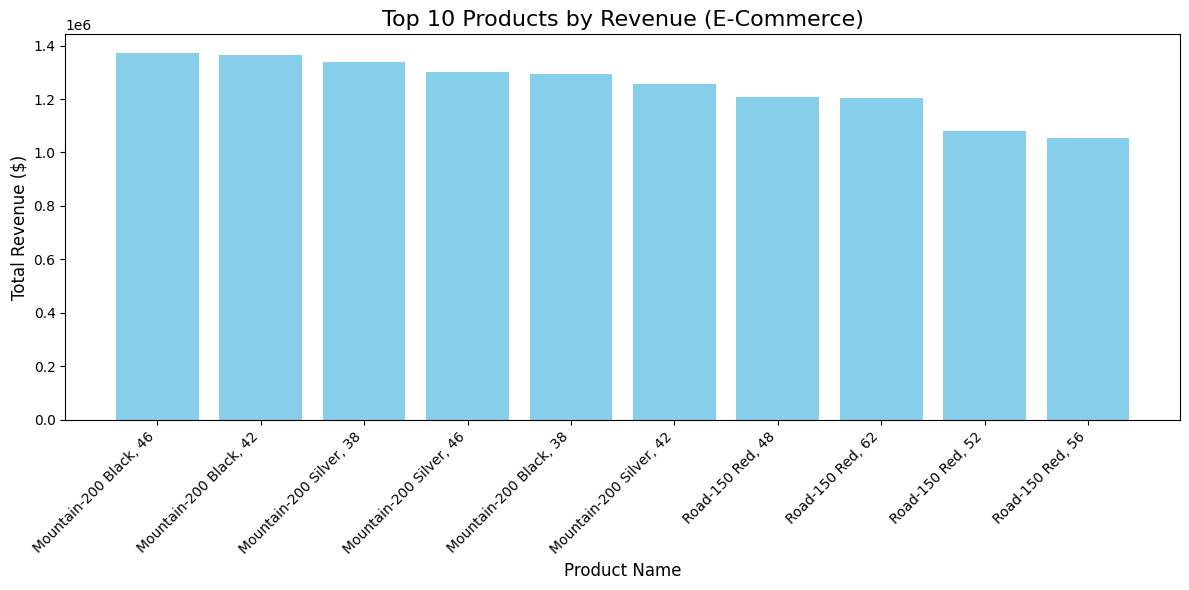

In [82]:
# Visualisering av Top 10 e-commerce produkter 
plt.figure(figsize=(12, 6))
plt.bar(top_products_df['ProductName'], top_products_df['TotalRevenue'], color='skyblue')
plt.title('Top 10 Products by Revenue (E-Commerce)', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [85]:
# Listar Top 10 e-commerce products grupperad enlight antal sålda produkter
top_products1_sql = """
SELECT TOP 10 
    ProductName,
    SUM(OrderQty) AS TotalQuantitySold,
    ROUND(SUM(LineTotal), 2) AS TotalRevenue
FROM 
    Sales.TerritoryOrderDetailProductView
WHERE 
    OnlineOrderFlag = 1
GROUP BY 
    ProductName
ORDER BY 
    SUM(OrderQty) DESC;

"""
top_products1_df = pd.read_sql(top_products1_sql, con=connection)
top_products1_df.head(10)

,ProductName,TotalQuantitySold,TotalRevenue
0,Water Bottle - 30 oz.,4244,21177.56
1,Patch Kit/8 Patches,3191,7307.39
2,Mountain Tire Tube,3095,15444.05
3,Road Tire Tube,2376,9480.24
4,"Sport-100 Helmet, Red",2230,78027.70
5,AWC Logo Cap,2190,19688.10
6,"Sport-100 Helmet, Blue",2125,74353.75
7,Fender Set - Mountain,2121,46619.58
8,"Sport-100 Helmet, Black",2085,72954.15
9,Mountain Bottle Cage,2025,20229.75


In [88]:
# Använder Sales.TerritoryOrderDetailProductView och Listar E-commerce sales data 
sales_by_territory_sql = """
SELECT 
    TerritoryName AS Territory,
    SUM(SubTotal) AS Sales
FROM 
    Sales.TerritoryOrderDetailProductView
WHERE 
    OnlineOrderFlag = 1
GROUP BY 
    TerritoryName
ORDER BY 
    Sales DESC;

"""
territory_data = pd.read_sql(sales_by_territory_sql, con=connection)
print(territory_data)

        Territory       Sales
0       Australia 16322659.45
1       Southwest 12037562.71
2       Northwest  7513583.71
3  United Kingdom  7388052.40
4         Germany  6320793.81
5          France  5598590.58
6          Canada  3980849.18
7       Southeast    43588.91
8       Northeast    16178.10
9         Central     5322.06


###  Map Visualisation av E-commerce sales grupperad enligt Territory med Geopandas

C:\Users\feasu\AppData\Local\Temp\ipykernel_15080\3843857354.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '16322659.4544' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  world.loc[world["NAME"].isin(countries), "EcommerceRevenue"] = sales
C:\Users\feasu\AppData\Local\Temp\ipykernel_15080\3843857354.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '12037562.7122' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  us_states.loc[us_states["name"].isin(states), "EcommerceRevenue"] = sales


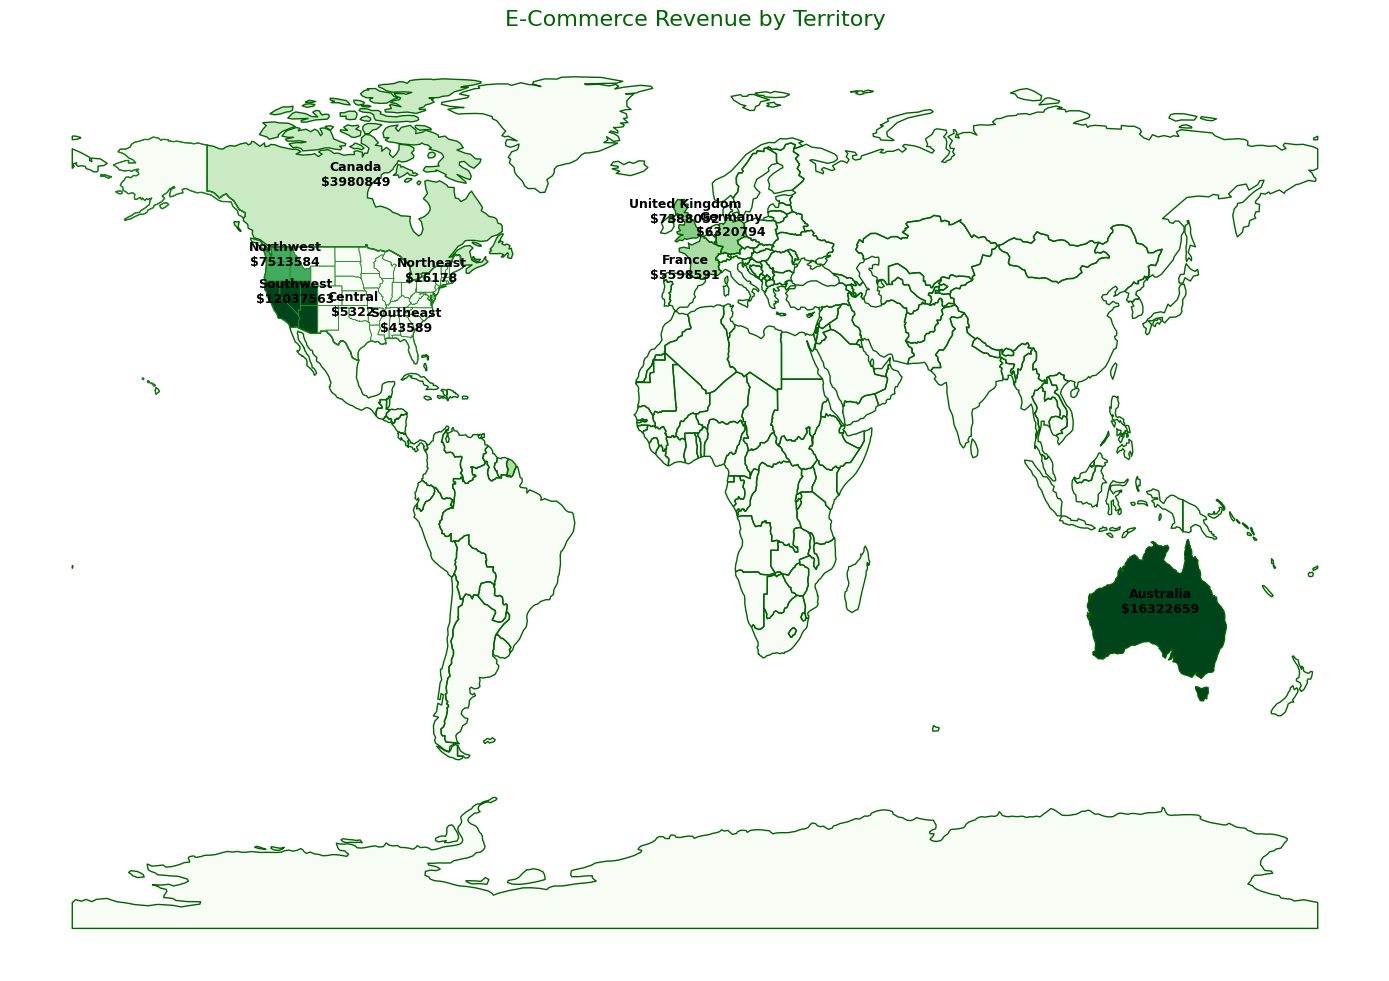

In [89]:
# Load the world map shapefile
world = gpd.read_file(r"C:\Users\feasu\Documents\#EC utbildning SQL\Materials for mapping\Countries\ne_110m_admin_0_countries.shp")

# Load a shapefile of US states
us_states = gpd.read_file(r"C:\Users\feasu\Documents\#EC utbildning SQL\Materials for mapping\States\ne_110m_admin_1_states_provinces.shp")

# Manual mapping of territories to specific countries and US states
territory_mapping = {
    "Australia": ["Australia"],
    "Southwest": ["California", "Nevada", "Arizona", "Utah"],
    "Northwest": ["Washington", "Oregon", "Idaho"],
    "United Kingdom": ["United Kingdom"],
    "Germany": ["Germany"],
    "France": ["France"],
    "Canada": ["Canada"],
    "Southeast": ["Florida", "Georgia", "Alabama", "South Carolina"],
    "Northeast": ["New York", "Massachusetts", "Pennsylvania", "New Jersey"],
    "Central": ["Texas", "Oklahoma", "Kansas", "Nebraska"],
}

# Initialize a new column for sales in the GeoPandas DataFrames
world["EcommerceRevenue"] = 0
us_states["EcommerceRevenue"] = 0

# Map the e-commerce sales to the world map and US states based on the territory mapping
territory_annotations = {}  # To track territory names and their centroids
for _, row in territory_data.iterrows():
    territory = row["Territory"]
    sales = row["Sales"]
    if territory in territory_mapping:
        if territory in ["Southwest", "Northwest", "Southeast", "Northeast", "Central"]:
            # Aggregate revenue at the territory level
            states = territory_mapping[territory]
            us_states.loc[us_states["name"].isin(states), "EcommerceRevenue"] = sales
            # Compute centroid for the territory
            territory_centroid = us_states[us_states["name"].isin(states)].geometry.union_all().centroid
            territory_annotations[territory] = (territory_centroid, sales)
        else:  # Non-US territories map to countries
            countries = territory_mapping[territory]
            world.loc[world["NAME"].isin(countries), "EcommerceRevenue"] = sales
            # Compute centroid for the country
            country_centroid = world[world["NAME"].isin(countries)].geometry.union_all().centroid
            territory_annotations[territory] = (country_centroid, sales)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
world.boundary.plot(ax=ax, linewidth=1, color="darkgreen")  # Country boundaries in dark green
us_states.boundary.plot(ax=ax, linewidth=0.5, color="forestgreen")  # US state boundaries in forest green
world.plot(
    column="EcommerceRevenue",
    cmap="Greens",  # Use shades of green
    legend=False,
    ax=ax
)
us_states.plot(
    column="EcommerceRevenue",
    cmap="Greens",  # Same colormap for consistency
    legend=False,
    ax=ax
)

# Add text annotations for territory names with revenue
for territory, (centroid, sales) in territory_annotations.items():
    ax.text(
        centroid.x, centroid.y, 
        f"{territory}\n${sales:.0f}",  # Format territory name and revenue
        fontsize=9, 
        ha="center", 
        color="black",  # Text color changed to black
        fontweight="bold"
    )

# Add title and remove axes for a cleaner visualization
ax.set_title("E-Commerce Revenue by Territory", fontsize=16, color="darkgreen")
ax.axis("off")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

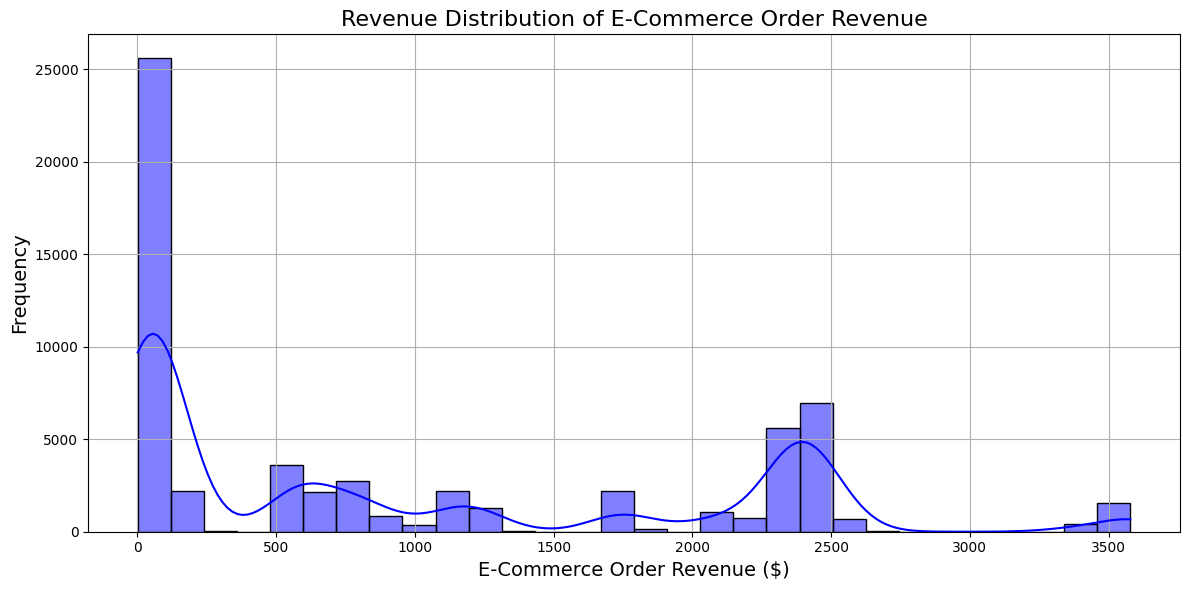

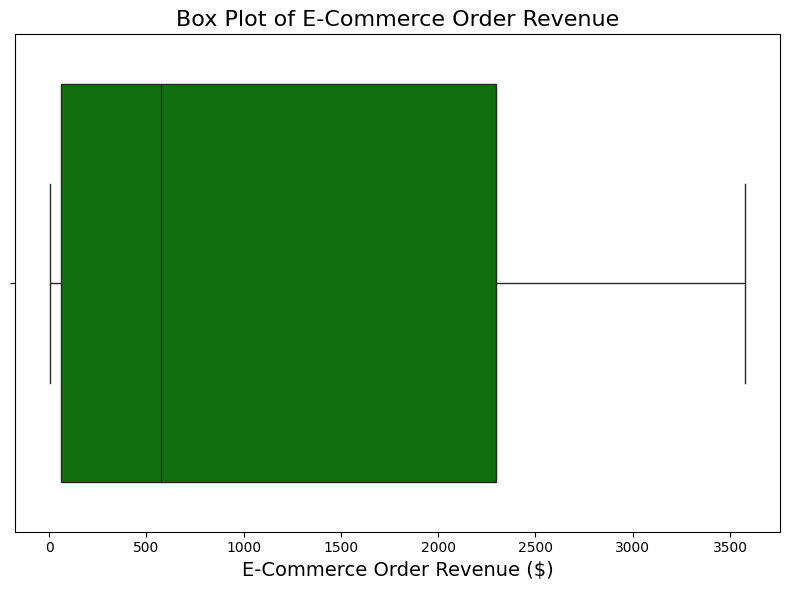

In [94]:
# Query and visualisation att visa E-commerce order värde distribution
ecommerce_order_value_sql = """
SELECT ROUND(SubTotal, 2) AS ECommerceOrderRevenue
FROM Sales.TerritoryOrderDetailProductView
WHERE OnlineOrderFlag=1  
"""
ecommerce_order_value_df = pd.read_sql_query(ecommerce_order_value_sql, con=connection)

# Convert data to NumPy array
ecommerce_order_value_array = ecommerce_order_value_df['ECommerceOrderRevenue'].to_numpy()


plt.figure(figsize=(12, 6))
sns.histplot(ecommerce_order_value_array, bins=30, kde=True, color='blue')
plt.title('Revenue Distribution of E-Commerce Orders', fontsize=16)
plt.xlabel('E-Commerce Order Revenue ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=ecommerce_order_value_array, color='green')
plt.title('Box Plot of E-Commerce Order Revenue', fontsize=16)
plt.xlabel('E-Commerce Order Revenue ($)', fontsize=14)
plt.tight_layout()
plt.show()

In [131]:
# Beräknar statistikal värde för Order Value med hjälp av Numpy Python library
mean = np.mean(ecommerce_order_value_array)
std_dev = np.std(ecommerce_order_value_array, ddof=1)  # Use ddof=1 for sample standard deviation
n =np.size(ecommerce_order_value_array)
median = np.median(ecommerce_order_value_array)
max_value = np.max(ecommerce_order_value_array)
min_value = np.min(ecommerce_order_value_array)

# Print results with labels and formatted to two decimal places

print(f"Maximum Value: {max_value:.2f}")
print(f"Minimum Value: {min_value:.2f}")
print(f"Mean: {mean:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Number of Observations: {n}")
print(f"Median: {median:.2f}")

Maximum Value: 3578.27
Minimum Value: 2.29
Mean: 980.61
Standard Deviation: 1062.78
Number of Observations: 60398
Median: 574.98


# Calculating Confidence interval for e-commerce order value (Revenue).

In [97]:
ecommerce_order_value_sql = """
SELECT ROUND(SubTotal, 2) AS ECommerceOrderRevenue
FROM Sales.TerritoryOrderDetailProductView
WHERE OnlineOrderFlag=1;
"""
ecommerce_order_value_df= pd.read_sql(ecommerce_order_value_sql, con=connection)
ecommerce_order_value_df.head()

,ECommerceOrderRevenue
0,2542.31
1,2514.93
2,2344.96
3,2329.98
4,2369.96


In [98]:
# Omvandlar pandas data frame till numpy array
ecommerce_order_value_array = ecommerce_order_value_df['ECommerceOrderRevenue'].to_numpy()
print(ecommerce_order_value_array[:5])

[2542.31 2514.93 2344.96 2329.98 2369.96]


In [99]:
# Beräknar värde som vi behöver för confidence intervall beräkningar
mean = np.mean(ecommerce_order_value_array)
std_dev = np.std(ecommerce_order_value_array, ddof=1)  # Use ddof=1 for sample standard deviation
n =np.size(ecommerce_order_value_array)
print(mean, std_dev, n)

980.6149473492501 1062.7751696918724 60398


In [100]:
# bestämmer confidence grad och .. frihet grad och beräknar t-värde enlight valda parametrar
confidence_level = 0.95
dof=n - 1

t_critical = t.ppf(1 - (1 - confidence_level) / 2, dof)
print(dof,t_critical)

60397 1.9600032632784585


In [101]:
# Beräknar övre och nedre gränsarna för confidensintervall
ci_lower=round((mean -  t_critical * (std_dev / np.sqrt(n))),2)
ci_upper=round((mean +  t_critical * (std_dev / np.sqrt(n))),2)

print(f"Mean ECommerce Order Revenue: {round(mean, 2)}")
print(f"95% Confidence Interval: ({ci_lower}, {ci_upper})")

Mean ECommerce Order Revenue: 980.61
95% Confidence Interval: (972.14, 989.09)


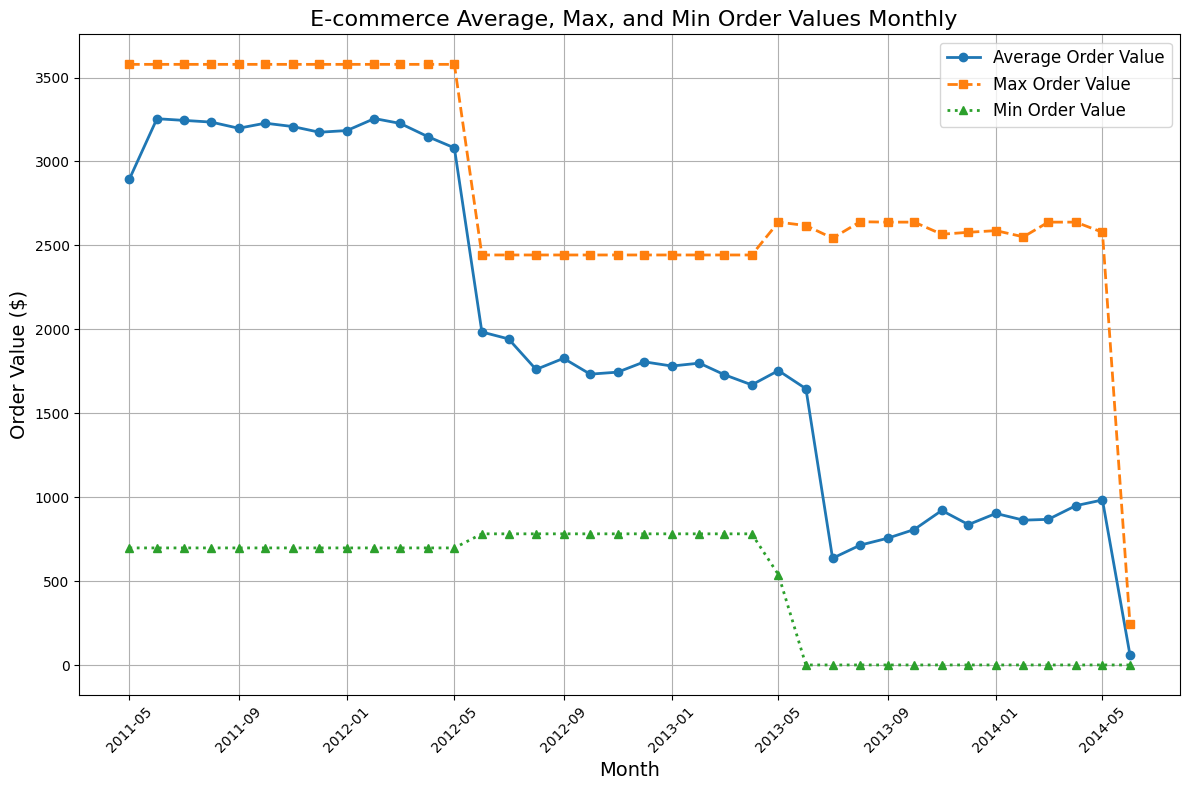

In [144]:
# SQL query för att undersöka och visualisera average, max, and min månatliga order värde
aov_sql = """
SELECT 
    FORMAT(OrderDate, 'yyyy-MM') AS Month,
    AVG(SubTotal) AS AvgOrderValue,
    MAX(SubTotal) AS MaxOrderValue,
    MIN(SubTotal) AS MinOrderValue
FROM Sales.TerritoryOrderDetailProductView
WHERE OnlineOrderFlag=1
GROUP BY FORMAT(OrderDate, 'yyyy-MM')
ORDER BY Month;
"""


aov_df = pd.read_sql_query(aov_sql, con=connection)
    
# Convert Month to datetime for better plotting
aov_df['Month'] = pd.to_datetime(aov_df['Month'])

# Plotting Average, Max, and Min Order Values per Month
plt.figure(figsize=(12, 8))


plt.plot(aov_df['Month'],aov_df['AvgOrderValue'], marker='o', linestyle='-', linewidth=2, label='Average Order Value')

plt.plot(aov_df['Month'], aov_df['MaxOrderValue'], marker='s', linestyle='--', linewidth=2, label='Max Order Value')

plt.plot(aov_df['Month'], aov_df['MinOrderValue'], marker='^', linestyle=':', linewidth=2, label='Min Order Value')

plt.title(' E-commerce Average, Max, and Min Order Values Monthly', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Order Value ($)', fontsize=14)

plt.grid(True)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


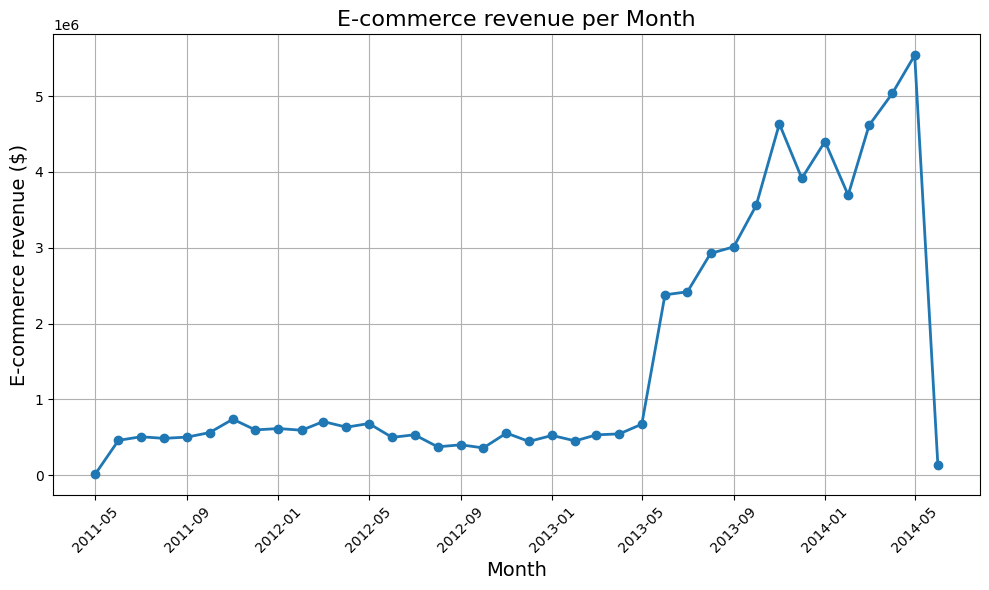

In [145]:
#SQL query och visualisering av e-commerce revenue per monad (exkluderad freight cost and Tax)

orval_month_sql = """
SELECT 
    FORMAT(OrderDate, 'yyyy-MM') AS Month,
    SUM(SubTotal) AS TotalOrderValue
FROM
    Sales.TerritoryRevOrderView
WHERE 
    OnlineOrderFlag = 1
GROUP BY 
    FORMAT(OrderDate, 'yyyy-MM')
ORDER BY 
    FORMAT(OrderDate, 'yyyy-MM');
"""

orval_month_df = pd.read_sql_query(orval_month_sql, con=connection) # Convert Month to datetime for better plotting

orval_month_df['Month'] = pd.to_datetime(orval_month_df['Month'])
   
plt.figure(figsize=(10, 6))
plt.plot(orval_month_df['Month'], orval_month_df['TotalOrderValue'], marker='o', linestyle='-', linewidth=2)
plt.title('E-commerce revenue per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('E-commerce revenue ($)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


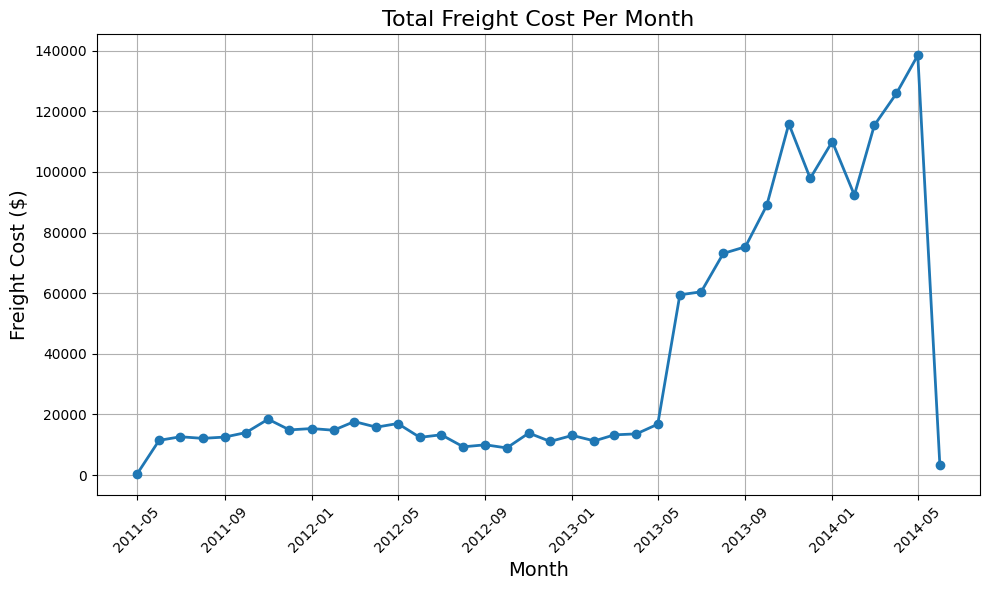

In [141]:
# SQL query som beräknar freight cost per month och visualiserar resultat
freight_sql = """
SELECT 
    FORMAT(OrderDate, 'yyyy-MM') AS Month,
    SUM(Freight) AS TotalFreightCost
FROM Sales.TerritoryRevOrderView
WHERE  OnlineOrderFlag = 1
GROUP BY FORMAT(OrderDate, 'yyyy-MM')
ORDER BY Month;
"""
freight_df = pd.read_sql_query(freight_sql,con=connection)


freight_df['Month'] = pd.to_datetime(freight_df['Month'])


plt.figure(figsize=(10, 6))
plt.plot(freight_df['Month'], freight_df['TotalFreightCost'], marker='o', linestyle='-', linewidth=2)
plt.title('Total Freight Cost Per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Freight Cost ($)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Distribution av Average order value 

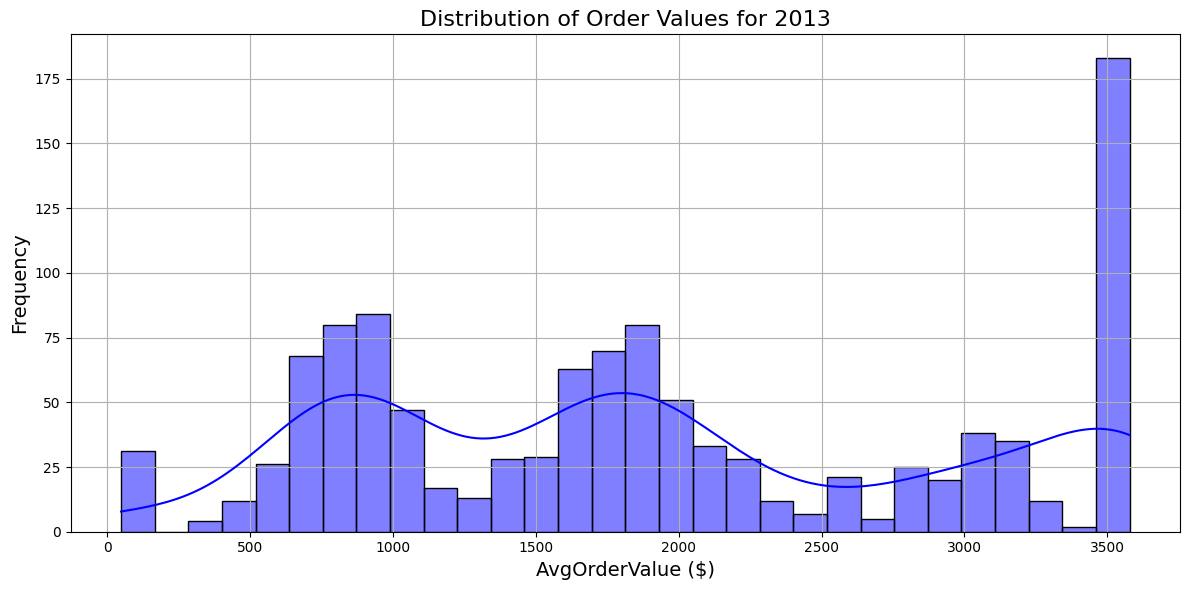

In [ ]:
aov_sql = """
SELECT 
    FORMAT(OrderDate, 'yyyy-MM-dd') AS OrderDay,
    AVG(SubTotal) AS AvgOrderValue
    
FROM 
    Sales.TerritoryOrderDetailProductView
WHERE 
    OnlineOrderFlag = 1
GROUP BY 
    FORMAT(OrderDate, 'yyyy-MM-dd')
ORDER BY 
    OrderDay;

"""
aov_df = pd.read_sql_query(aov_sql, engine)
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(aov_df['AvgOrderValue'], bins=30, kde=True, color='blue')
plt.title('Distribution of Average Order value 2011-2014', fontsize=16)
plt.xlabel('AvgOrderValue ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.tight_layout()


plt.show()

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=aov_array, color='green')
plt.title('Box Plot of E-Commerce Order Revenue', fontsize=16)
plt.xlabel('E-Commerce Order Revenue ($)', fontsize=14)
plt.tight_layout()
plt.show()

In [132]:
aov_array = aov_df['AvgOrderValue'].to_numpy()

mean_1 = np.mean(aov_array)
std_dev_1 = np.std(aov_array, ddof=1)  
n_1 = np.size(aov_array)
median_1 = np.median(aov_array)
max_value_1 = np.max(aov_array)
min_value_1 = np.min(aov_array)


print(f"Mean: {mean_1:.2f}")
print(f"Standard Deviation: {std_dev_1:.2f}")
print(f"Number of Observations: {n_1}")
print(f"Median: {median_1:.2f}")
print(f"Maximum Value: {max_value_1:.2f}")
print(f"Minimum Value: {min_value_1:.2f}")

Mean: 1919.12
Standard Deviation: 1039.28
Number of Observations: 1124
Median: 1795.24
Maximum Value: 3578.27
Minimum Value: 48.20


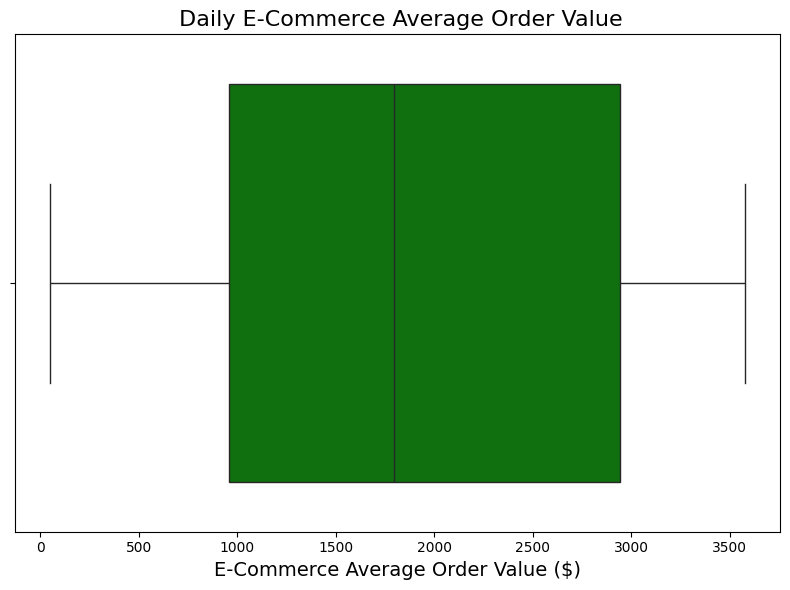

In [129]:
#Box plot för daglig Average Order Value destribution
plt.figure(figsize=(8, 6))
sns.boxplot(x=aov_array, color='green')
plt.title(' Daily E-Commerce Average Order Value', fontsize=16)
plt.xlabel('E-Commerce Average Order Value ($)', fontsize=14)
plt.tight_layout()
plt.show()

## Confidence intervall för dagligen E-commerce Average Order Value

In [123]:
aov_array = aov_df['AvgOrderValue'].to_numpy()
print(aov_array[:5])

[2895.4676 3482.88   3002.4356 3578.27   3002.4356]


In [124]:
mean_1 = np.mean(aov_array)
std_dev_1 = np.std(aov_array, ddof=1)  
n_1 =np.size(aov_array)
print(mean_1, std_dev_1, n_1)

1919.121166548043 1039.2810201556556 1124


In [125]:
confidence_level_1 = 0.95
dof_1=n_1 - 1

t_critical_1 = t.ppf(1 - (1 - confidence_level_1) / 2, dof_1)
print(dof_1,t_critical_1)

1123 1.9620786654072877


In [126]:
ci_lower_1=round((mean_1 -  t_critical * (std_dev_1 / np.sqrt(n_1))),2)
ci_upper_1=round((mean_1 +  t_critical * (std_dev_1 / np.sqrt(n_1))),2)

print(f"Mean Average order value: {round(mean_1, 2)}")
print(f"95% Confidence Interval: ({ci_lower_1}, {ci_upper_1})")

Mean Average order value: 1919.12
95% Confidence Interval: (1858.36, 1979.88)


### Average order value grupperad per Territory

In [149]:


# SQL query to calculate average order value by territory
territory_monthly_avg_sql = """
SELECT 
    TerritoryName,
    AVG(SubTotal) AS AvgOrderValue
FROM 
    Sales.TerritoryOrderDetailProductView
WHERE 
    OnlineOrderFlag = 1
GROUP BY 
    TerritoryName
ORDER BY 
    AvgOrderValue DESC;
"""

# Execute the query and load data into a DataFrame
territory_monthly_avg_df = pd.read_sql_query(territory_monthly_avg_sql, con=connection)
territory_monthly_avg_df.head(12)



,TerritoryName,AvgOrderValue
0,Australia,1223.13
1,Germany,1123.70
2,Southeast,1117.66
3,United Kingdom,1069.80
4,France,1007.30
5,Southwest,981.46
6,Northwest,835.49
7,Northeast,599.19
8,Canada,522.42
9,Central,266.10


### Average order value grupperad per Territory och Månad

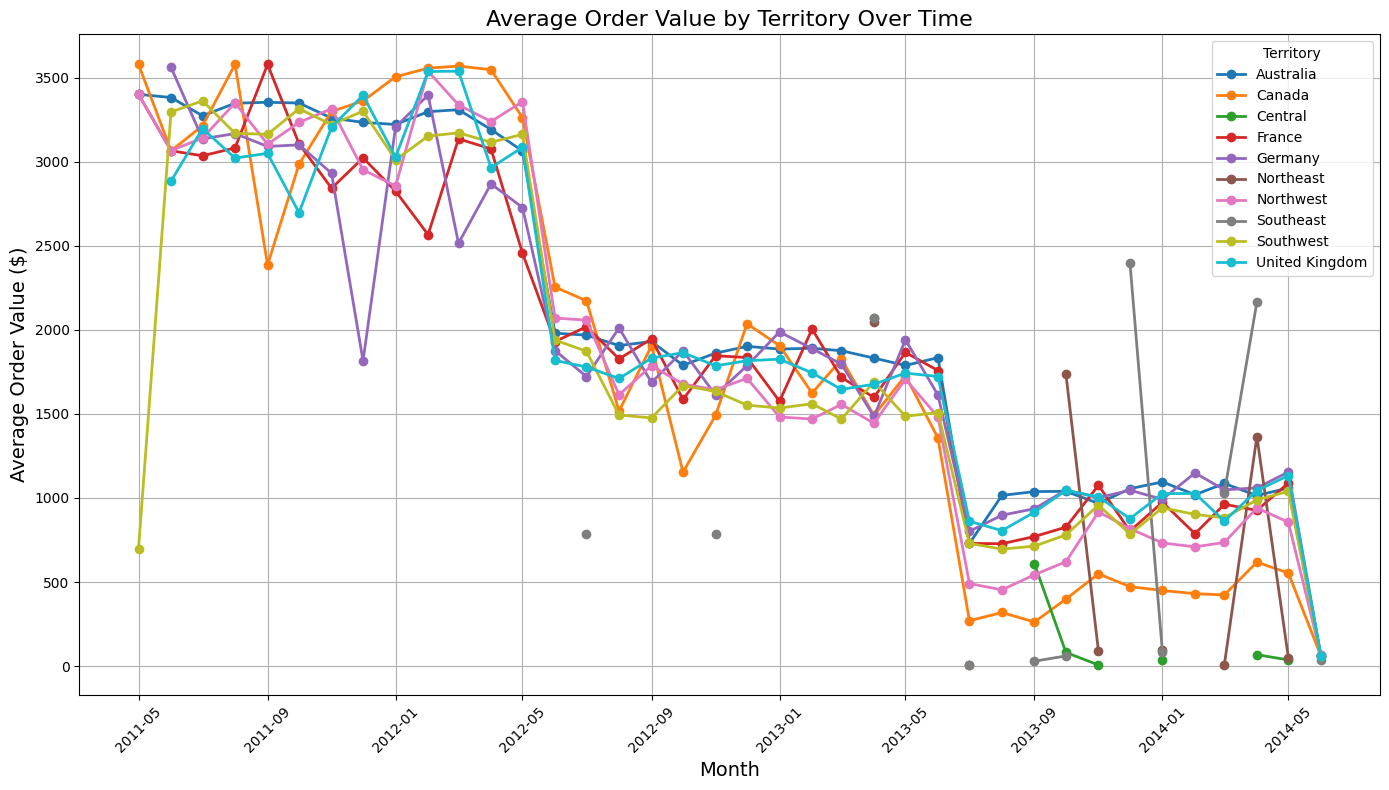

In [ ]:


# SQL query och visualisering av Average Order Value grupperad på Territory och månad
territory_monthly_avg_sql = """
SELECT 
    TerritoryName,
    FORMAT(OrderDate, 'yyyy-MM') AS Month,
    AVG(SubTotal) AS AvgOrderValue
FROM 
    Sales.TerritoryOrderDetailProductView
WHERE 
    OnlineOrderFlag = 1
GROUP BY 
    TerritoryName, FORMAT(OrderDate, 'yyyy-MM')

ORDER BY 
    TerritoryName, Month;
"""

territory_monthly_avg_df = pd.read_sql_query(territory_monthly_avg_sql, con=connection)

territory_monthly_avg_df['Month'] = pd.to_datetime(territory_monthly_avg_df['Month'])

pivoted_df = territory_monthly_avg_df.pivot(index='Month', columns='TerritoryName', values='AvgOrderValue')

plt.figure(figsize=(14, 8))
for territory in pivoted_df.columns:
    plt.plot(
        pivoted_df.index,
        pivoted_df[territory],
        marker='o',
        linestyle='-',
        linewidth=2,
        label=territory
    )

plt.title('Average Order Value by Territory Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Order Value ($)', fontsize=14)
plt.grid(True)
plt.legend(title="Territory", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## Resultat av statistisk analys för E-commerce revenue och Average order value

När jag tittar närmare på analysen av ECommerce Order Revenue ser jag att fördelningen av datan varierar mycket. Det högsta värdet är 3578,27 och det lägsta värdet är 2,29, vilket visar
 att orderintäkterna har ett stort spann. Medelvärdet är 980,61, och standardavvikelsen är 1062,78, vilket innebär att det finns stor spridning i datan. Datasetet innehåller 60 398 observationer,
  vilket gör resultaten statistiskt tillförlitliga. Medianvärdet är 574,98, vilket är mycket lägre än medelvärdet. Detta visar att datan är högerskev, där ett fåtal stora ordervärden höjer medelvärdet.
Medianen är en bättre representation av det typiska ordervärdet eftersom den inte påverkas av extremvärden på samma sätt som medelvärdet. Den högerskeva fördelningen antyder att det finns vissa dagar med mycket höga intäkter som påverkar medelvärdet kraftigt. Konfidensintervallet för medelvärdet är (972,14–989,09) med 95 % säkerhet. Detta innebär att det sanna genomsnittliga ordervärdet med 95 % sannolikhet ligger inom detta intervall.

Om vi kollar på E-commerce Average Order value grupperad per dag är medelvärdet för det dagliga genomsnittliga ordervärdet (AOV) är 1919,12, vilket ligger inom ett 95 % konfidensintervall på (1858,36, 1979,88).  Detta intervall visar att det sanna medelvärdet med 95 % sannolikhet finns inom detta intervall och bidrar till en säkerhetsmarginal för tolkningen av genomsnittligt ordervärde. Medelvärdet är något högre än medianen på 1795,24 vilket indikerar en högerskev fördelning och innebär att vissa dagar med höga AOV drar upp medelvärdet, samtidigt som konfidensintervallet bekräftar att variationen är stabil. Standardavvikelsen på 1039,28 visar på stor variation mellan dagar, men konfidensintervallet fångar denna spridning och ger en tydligare bild av den genomsnittliga variationen. Maxvärdet på 3578,27 indikerar dagar med höga inköp medan minimivärdet på 48,20 tyder på dagar med låga försäljningsvolymer eller små transaktioner. Medianen på 1795,24 representerar det typiska dagliga AOV bättre än medelvärdet eftersom det är mindre känsligt för extrema värden. Konfidensintervallet bekräftar att medelvärdet är en pålitlig uppskattning trots den stora variationen och kan användas som grund för strategiska beslut.


## Dataanalys med slutsatser och rekommendationer

Jag vill undersöka företagets e-handelsförsäljning närmare, eftersom den generellt presterar betydligt sämre än butikens försäljning. Detta väcker frågor om vilka faktorer som påverkar e-handelskanalen och hur den kan förbättras. En mer detaljerad analys visar att Australien och sydvästra USA är de mest framgångsrika regionerna inom e-handel, både i försäljning och i genomsnittligt ordervärde. Centrala USA och nordöstra/sydöstra regionerna presterar betydligt sämre, med både låga försäljningsvärden och lågt AOV. De europeiska regionerna (Tyskland, Storbritannien och Frankrike) har god försäljning och höga AOV, vilket tyder på en stabil marknad.

Intäkterna visar en ojämn fördelning där majoriteten av värdena ligger på den lägre sidan, medan några få höga värden drar upp genomsnittet. Medianvärdet på 574,98 är betydligt lägre än genomsnittet på 980,61, vilket bekräftar denna trend. Konfidensintervallet för genomsnittet (972,14–989,09) visar att beräkningen av medelvärdet är tillförlitlig trots variationerna i datan. På daglig basis följer AOV en liknande fördelning, med ett genomsnitt på 1919,12 och ett konfidensintervall på (1858,36–1979,88). Variationen i de dagliga värdena är stor, vilket syns i standardavvikelsen på 1039,28 och 
de högsta och lägsta dagliga värdena på 3578,27 och 48,20 ligger långt ifrån varandra. Medianen på 1795,24 för dagliga AOV ger dock en bättre bild av vad som är vanligt, eftersom den inte påverkas lika mycket av extremvärden.
En vidare analys rekommenderas för att identifiera mönster hos dagar med höga AOV och optimera strategier baserade på dessa insikter för att hålla eller förbättra det dagliga genomsnittliga ordervärdet inom eller över konfidensintervallets gränser. Medianen kan samtidigt fungera som ett värdefullt komplement vid analys av typiskt dagligt beteende.

Vi observerar också att e-handelsförsäljningen ökar stadigt år efter år, särskilt från maj 2013, vilket visar en tydlig tillväxttrend i företagets intäkter. Dock ser vi att försäljningen nästan sjunker till noll i maj 2014, vilket sannolikt beror på att företaget upphörde med sin verksamhet. Samtidigt märker vi en oroande trend: medan försäljningen ökar, minskar genomsnittligt ordervärde (AOV) successivt år efter år. Detta tyder på att kunder gör fler beställningar, men att varje enskild order tenderar att ha ett lägre värde än tidigare.
Under samma period ser vi att fraktkostnaderna ökar i takt med intäkterna, vilket antyder att logistikkostnaderna är direkt kopplade till försäljningsvolymen. Detta kan innebära att det blir dyrare för företaget att hantera den ökande ordervolymen, särskilt om lägre AOV innebär fler mindre beställningar som kräver separata leveranser.

För att bättre förstå dessa trender är det viktigt att analysera relationen mellan AOV, fraktkostnader och intäkter mer detaljerat. En sådan analys kan ge insikter om vilka faktorer som driver de ökande fraktkostnaderna och om företaget kan göra förändringar för att optimera lönsamheten, exempelvis genom att justera sina leveransvillkor, effektivisera logistiken eller omfördela sin produktmix för att öka AOV. Den sjunkande AOV i kombination med ökande fraktkostnader kan vara en risk för företagets framtida lönsamhet om det inte åtgärdas.



## Executive Summary

Analysen visar att företagets e-handelsförsäljning generellt presterar sämre än butikens försäljning, men vissa regioner som Australien och Sydvästra USA utmärker sig positivt. 
E-handelsförsäljningen har stadigt ökat, särskilt från maj 2013.  Samtidigt har genomsnittligt ordervärde (AOV) minskat år för år, vilket antyder att kunder gör fler men mindre
värdefulla beställningar. Fraktkostnaderna har ökat proportionellt med intäkterna, vilket kan innebära att företagets logistikkostnader blir en allt större utmaning.

E-handelns intäkter är ojämnt fördelade, där de flesta beställningar har lägre värden, men några få höga värden höjer genomsnittet vilket ligger  på 980,61. Det typiska
 ordervärdet på 574,98 är dock lägre än genomsnittet, vilket visar att de höga värdena inte är representativa för flertalet beställningar. Även på daglig nivå ser vi en 
 liknande trend, där det genomsnittliga dagliga ordervärdet påverkas av stora variationer. De högsta och lägsta dagliga värdena på 3578,27 och 48,20 ligger långt ifrån varandra,
  men det typiska dagliga ordervärdet på 1795,24 ger en mer rättvisande bild av vad som är vanligast. Analysen visar ändå att medelvärdet på 1919,12 är tillförlitligt och kan 
  användas för att förstå trenderna i intäkterna över tid.

Fortsatt analys bör fokusera på att identifiera mönster hos dagar med höga AOV, optimera logistikkostnader och undersöka hur produktmix eller prisstrategi kan justeras för att
 öka AOV. Den sjunkande trenden för AOV tillsammans med stigande fraktkostnader kan innebära en långsiktig risk för lönsamheten och kräver strategiska åtgärder för att säkerställa 
företagets framgång.


### Självvärdering

De största utmaningarna i arbetet för mig var att identifiera vilka områden som borde undersökas och att hitta relevanta tabeller i databasen för analys. Databasen är mycket omfattande, vilket gjorde det tidskrävande att förstå relationerna mellan data och hur de hänger ihop. ER-diagrammet var till stor hjälp, eftersom jag innan dess hade spenderat en halv dag på att försöka skapa en överblick utan att lyckas få en tydlig bild.

Jag ville effektivisera och underlätta arbetet med att skriva SQL-frågor genom att använda Views. Till slut lyckades jag, men processen var utmanande då jag behövde förstå exakt vilka kolumner som skulle inkluderas. Jag var tvungen att droppa och återskapa min View flera gånger för att lägga till ytterligare kolumner jag insåg att jag behövde. Att inkludera alla kolumner från de fyra nödvändiga tabellerna kändes inte som en effektiv lösning enligt min uppfattning, men det hade kanske varit ett mer tids optimalt alternativ.
En annan stor utmaning var att skapa en karta med GeoPandas för att visualisera data geografiskt. Det tog mycket tid att få kartan att se bra ut, och jag behövde felsöka och justera flera gånger för att uppnå ett acceptabelt resultat. Till slut använde jag ChatGPT för att lösa problemen och få kartan att fungera korrekt både med en översiktskarta och en karta över delstaterna i USA. Jag använde också ChatGPT för att förbättra utseendet på några andra visualiseringar.

Jag hoppas verkligen att jag överträffar G-nivån med mina undersökningar och analyser.

 Ett råd jag skulle ge mig själv är att börja skriva analyser redan under tiden jag utför undersökningarna. Det skulle ha hjälpt mig att både begränsa undersökningsområdet (många potentiella undersökningar förkastades under projektets gång) och att gräva djupare i de områden jag ville fokusera på. Detta skulle ha gjort arbetsprocessen mer effektiv och riktad.
